In [14]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

## Requirements
The scripts have been tested on Debian-based Linux installations
Note: The script makes use of the GAMA Headless interface (more information here). In order to make use of this interface, Java Runtime version 8(!!) is required. 

Furthermore, the following dependencies will be installed by importing the attached environment (see: gamampi4py.yml)
* pandas
* numpy 
* mpi4py 
* pyarrow
* tempfile; by default installed in an Anconda environment
* matplotlib; for plotting the results

## Introduction

The tutorial on how to use the scripts consists out of five parts: 
1. Setting upt the model specifics
2. Setting up the experiment one wants to run
3. Setting up the outputs one wants to analyse
4. Running the model 
5. Reading the produced results

Note that the output of the first three steps are exported as a .csv file for standalone fetching by the scripts in MPI.py

In [2]:
# model-specifics
model_specifics_dict = {}

model_specifics_dict["model_location_string"] = ["/home/daan/Documents/GitHub/GAMA_MPI4Py/predatorPrey/predatorPrey.gaml"]# the location of the GAMA model
model_specifics_dict["GAMA_location_string"] = ["/home/daan/GAMA"] # the location of GAMA main folder
model_specifics_dict["experiment_name"] = ["prey_predatorExp"] # experiment name as defined in the .gaml file
model_specifics_dict["stopping_condition"] = ["cycle=1000"] # stopping condition (> or < do not work)

# Export as .csv
pd.DataFrame(model_specifics_dict).to_csv("model_specifics.csv")

## Construct experiment list
1. Permutation policy parametres
2. Permutation scenario parametres
3. Join both permutations
4. Export to .csv files with: 
    * name "input_parametres.csv"
    * parametre names as column names 
    

In [4]:
variables_dict = {}
variables_dict["nb_predators_init"] = [0,20,50,70]
variables_dict["nb_preys_init"] = [0,100,300,500,700]
    
# permutate the policy options
res = [[i, j]  for i in variables_dict["nb_predators_init"]
                         for j in variables_dict["nb_preys_init"]]

# number of replications NOTE: model should not have a fixed seed when using this
nb_replications = 2
parameter_values = list()
for i in range(nb_replications):
    for j in res:
        parameter_values.append(j)

parameter_names = list()
for i in variables_dict:
    parameter_names.append(i)

pd.DataFrame(parameter_values,columns=parameter_names).to_csv("input_parameters.csv")

## Construct output list
1. Specify the outputs as monitors in the GAMA model
2. Specify the same outputs in one array
3. Export as csv file "output_names.csv"

Note that the framerate is fixed on 1 (meaning one recorded value per tick)

In [5]:
output_names = list()
# List the names of the desired output
output_names.append("Number of preys")
output_names.append("Number of predators")

pd.DataFrame(output_names).to_csv("output_names.csv")

## Run GAMA model in parallel using MPI  
1. mpiexec as MPI caller
2. -np m with m as number of threads (the total number of runs should be a multiple of m)
3. python specifying the python communicator
4. filename.py the independently runnable python script
5. os.system as bash communicator 

Note: the MPI interfaces makes use of a separate kernel. Therefore the script should be called from a separate terminal. 

In [6]:
os.system("mpiexec -np 2 python MPI.py")

256

## Import results from Feather file
1. Exported to binary Feather in subdir "results"
2. Feather file named after experiment_name

In [8]:
results = pd.read_feather("./results/%s"%model_specifics_dict["experiment_name"][0])
input_vars = pd.read_csv("input_parameters.csv")

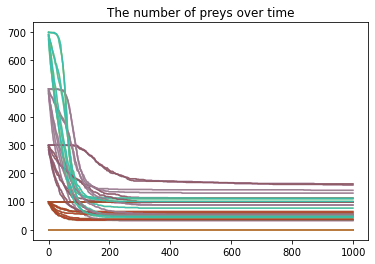

In [13]:
import matplotlib.pyplot as plt
x = np.linspace(0,999,1000)
for i in input_vars.index:
    for j in range(nb_replications):
        plt.plot(x,results.o1[results.o0==i],alpha=0.75)#.iloc[j*1000:(j+1)*1000])
plt.title("The number of preys over time");

In [ ]:
# To do's: 

# * Benchmarking
# * Make it work with undetermined processor/replication numbers
